# OCT volumes for glaucoma detection
Creators

    Ishikawa, Hiroshi

#### Description

OCT volumes used for the training and evaluation of a glaucoma detection classifier as described in

A feature agnostic approach for glaucoma detection in OCT volumes
https://arxiv.org/abs/1807.04855

Volumes are in NumPy format. A viewer is available at https://github.com/maet3608/oct-viewer


In [1]:
import data_load
import numpy as np

data_loader = data_load.DataLoader()
# image_data, np_array_data, labels_data = data_loader.retina()
np_array_data, labels_data, patient_id, eye_side = data_loader.retina_npy()



Normal


In [2]:
train_indeces = np.loadtxt("./data/train_data_indeces.npy").astype(np.int64)
test_indeces = np.loadtxt("./data/test_data_indeces.npy").astype(np.int64)

In [6]:
len(train_indeces), len(test_indeces)

(882, 228)

In [3]:
train_oct = np.array(np_array_data[train_indeces])
test_oct = np.array(np_array_data[test_indeces])
train_labels = np.array(labels_data[train_indeces])
test_labels = np.array(labels_data[test_indeces])
train_patient_id = np.array(patient_id[train_indeces])
test_patient_id = np.array(patient_id[test_indeces])
train_eye_side = np.array(eye_side[train_indeces])
test_eye_side = np.array(eye_side[test_indeces])

In [12]:
train_oct.shape, test_oct.shape[0]


((882, 64, 128, 64), 228)

In [7]:
train_labels.shape, test_labels.shape

((882,), (228,))

In [11]:
train_patient_id.shape[0]

882

In [18]:
from sklearn.model_selection import GroupShuffleSplit 

splitter = GroupShuffleSplit(test_size=0.2, n_splits=1, random_state = 7)
split = splitter.split(np_array_data, groups=patient_id)
train_inds, test_inds = next(split)

train = np_array_data[train_inds]
test = np_array_data[test_inds]



In [23]:
print(train_inds.dtype)

int64


In [19]:
print(f"train shape: {train.shape}, test shape: {test.shape}")

train shape: (882, 64, 128, 64), test shape: (228, 64, 128, 64)


In [2]:
# generate cross-validation folds
cv_split = data_loader.retina_npy_split(np_array_data, labels_data, patient_id, 10,True,42)

ValueError: Invalid value for test_size: True

NameError: name 'cv_split' is not defined

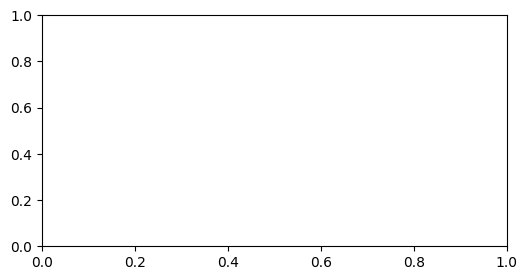

In [5]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(6, 3))
data_loader.plot_kfold(cv_split, ax)
plt.tight_layout()
fig.subplots_adjust(right=0.6)

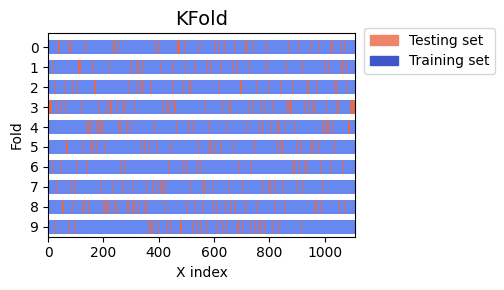

In [15]:
from sklearn.model_selection import GroupKFold
import matplotlib.pyplot as plt
gkf2 = GroupKFold(n_splits=10, shuffle=True, random_state=53)
cv_split2 = gkf2.split(X=np_array_data, y=labels_data, groups = patient_id)
fig2, ax2 = plt.subplots(figsize=(6, 3))
data_loader.plot_kfold(cv_split2, ax2)
plt.tight_layout()
fig2.subplots_adjust(right=0.6)
plt.show()

In [ ]:
for i, (train_idx, test_idx) in enumerate(gkf2.split(X=np_array_data, y=labels_data, groups = patient_id)):
    print(f"Fold {i+1}:")
    # print(f"Train indices: {train_idx[0:10]}")
    # print(f"Test indices: {test_idx[0:10]}")
    print(sum(labels_data[train_idx])/len(train_idx), sum(labels_data[test_idx])/len(test_idx))


Fold 1:
0.7625250501002004 0.7678571428571429
Fold 2:
0.755223880597015 0.8380952380952381
Fold 3:
0.7607607607607607 0.7837837837837838
Fold 4:
0.7716297786720322 0.6896551724137931
Fold 5:
0.7604790419161677 0.7870370370370371
Fold 6:
0.7665330661322646 0.7321428571428571
Fold 7:
0.7622377622377622 0.7706422018348624
Fold 8:
0.7625250501002004 0.7678571428571429
Fold 9:
0.769307923771314 0.7079646017699115
Fold 10:
0.7595190380761523 0.7946428571428571


In [8]:
https://matplotlib.org/stable/gallery/mplot3d/rotate_axes3d_sgskip.html#

SyntaxError: invalid syntax (1899857523.py, line 1)